In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

import numpy as np
import tensorflow as tf
import time
import matplotlib.pyplot as plt

import utils

In [15]:
learning_rate = 0.001
batch_size = 128
n_epochs = 60
n_train = 60000
n_test = 10000

In [3]:
mnist_folder = './data/mnist'
#utils.download_mnist(mnist_folder)

In [4]:
train, val, test = utils.read_mnist(mnist_folder, flatten=True)

In [5]:
train_data = tf.data.Dataset.from_tensor_slices(train)
train_data = train_data.shuffle(100)
train_data = train_data.batch(batch_size)

test_data = tf.data.Dataset.from_tensor_slices(test)
test_data = test_data.batch(batch_size)

In [6]:
iterator = tf.data.Iterator.from_structure(train_data.output_types, train_data.output_shapes)
img,label = iterator.get_next()
train_iter = iterator.make_initializer(train_data)
test_iter  = iterator.make_initializer(test_data)

In [7]:
w1 = tf.get_variable("weights1",shape=(784,256), initializer = tf.truncated_normal_initializer())
b1 = tf.get_variable("bias1", shape = (1,256), initializer = tf.zeros_initializer())
w2 = tf.get_variable("weights2", shape=(256,64), initializer = tf.truncated_normal_initializer())
b2 = tf.get_variable("bias2", shape = (1,64), initializer = tf.zeros_initializer())
w3 = tf.get_variable("weights3", shape=(64,10), initializer = tf.truncated_normal_initializer())
b3 = tf.get_variable("bias3", shape = (1,10), initializer = tf.zeros_initializer())

In [8]:
z1 = tf.matmul(img, w1) + b1 
a1 = tf.nn.relu(z1)
z2 = tf.matmul(a1, w2) + b2
a2 = tf.nn.relu(z2)
#z3 = tf.matmul(a2, w3) + b3
#a3 = tf.nn.relu(z3)
logits = tf.matmul(a2,w3) + b3
#logits = tf.matmul(img, w1) + b1 

predictions = tf.nn.softmax(logits)

In [9]:
entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits = logits, labels = label, name = "entropy")
loss = tf.reduce_mean(entropy, name = "loss")

In [10]:
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

In [11]:
correct_preds = tf.equal(tf.argmax(predictions,1), tf.argmax(label, 1))
accuracy = tf.reduce_sum(tf.cast(correct_preds, tf.float32))

In [12]:
#writer = tf.summary.FileWriter("./graphs/log_reg/2", tf.get_default_graph())

In [16]:
loss_list = []
epoch_list = []
with tf.Session() as sess:
    start = time.time()
    sess.run(tf.global_variables_initializer())
    
    for i in range(n_epochs):
        sess.run(train_iter)
        total_loss = 0
        n_batches = 0
        try:
            while True:
                _,l = sess.run([optimizer,loss])
                total_loss += l
                n_batches += 1
        except tf.errors.OutOfRangeError:
            pass
        print("Average loss epoch {0}: {1}".format(i,total_loss/n_batches))
        loss_list.append(total_loss/n_batches)
        epoch_list.append(i)
    print("Finished training! Total time taken {0}s". format(time.time()-start))
    
    sess.run([test_iter])
    total_loss = 0
    total_accuracy = 0
    try:
        while True:
            acc = sess.run(accuracy)
            total_accuracy += acc
    except tf.errors.OutOfRangeError:
        pass
    print("Accuracy = {0}".format(total_accuracy/n_test))

Average loss epoch 0: 26.851519334039022
Average loss epoch 1: 4.934057254569475
Average loss epoch 2: 2.4848585705077926
Average loss epoch 3: 1.431748190279617
Average loss epoch 4: 0.8536056345285371
Average loss epoch 5: 0.5616357563193455
Average loss epoch 6: 0.4017425876197427
Average loss epoch 7: 0.32272596001018616
Average loss epoch 8: 0.26299855017731355
Average loss epoch 9: 0.23385209581533142
Average loss epoch 10: 0.20963838711207688
Average loss epoch 11: 0.1987879616879793
Average loss epoch 12: 0.18434157265826714
Average loss epoch 13: 0.1968655033773461
Average loss epoch 14: 0.16097416259175124
Average loss epoch 15: 0.14897160851938088
Average loss epoch 16: 0.14182358876217244
Average loss epoch 17: 0.14144520108089892
Average loss epoch 18: 0.12986299491346662
Average loss epoch 19: 0.11880658519519276
Average loss epoch 20: 0.1024596780408607
Average loss epoch 21: 0.1033959015998123
Average loss epoch 22: 0.09481956247500209
Average loss epoch 23: 0.090038682

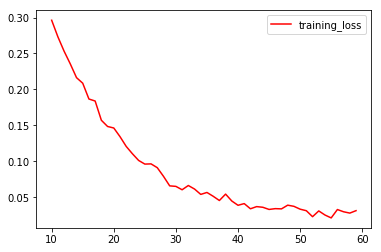

In [14]:
plt.plot(epoch_list[10:],loss_list[10:], 'r', label = "training_loss")
plt.legend()
plt.show()

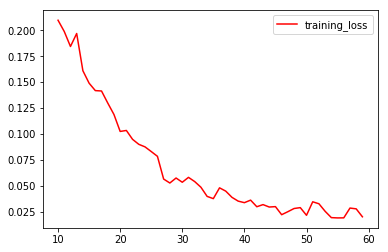

In [17]:
plt.plot(epoch_list[10:],loss_list[10:], 'r', label = "training_loss")
plt.legend()
plt.show()

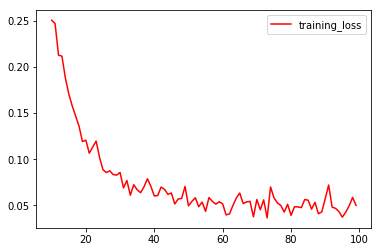

In [22]:
plt.plot(epoch_list[10:],loss_list[10:], 'r', label = "training_loss")
plt.legend()
plt.show()

In [ ]:
plt.plot(epoch_list[10:],loss_list[10:], 'r', label = "training_loss")
plt.legend()
plt.show()

In [ ]:
"Sigmoid, 128,32"
Finished training! Total time taken 24.76177453994751s
Accuracy = 0.9594

"Relu, 128,32"
Finished training! Total time taken 25.204363107681274s
Accuracy = 0.9639

